## **Differentiate or Integrate Select Time Window from a SEED File**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime


Read, print file header and plot complete file
Assumption: SEED files contains three component data, hence three traces.


3 Trace(s) in Stream:
BK.BK72..HHE | 2020-06-09T00:00:00.008391Z - 2020-06-09T23:59:59.998391Z | 100.0 Hz, 8640000 samples
BK.BK72..HHN | 2020-06-09T00:00:00.008393Z - 2020-06-09T23:59:59.998393Z | 100.0 Hz, 8640000 samples
BK.BK72..HHZ | 2020-06-09T00:00:00.008391Z - 2020-06-09T23:59:59.998391Z | 100.0 Hz, 8640000 samples
         network: BK
         station: BK72
        location: 
         channel: HHE
       starttime: 2020-06-09T00:00:00.008391Z
         endtime: 2020-06-09T23:59:59.998391Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 2354, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 9641984})
         network: BK
         station: BK72
        location: 
         channel: HHN
       starttime: 2020-06-09T00:00:00.008393Z
         endtime: 2020-06-09T23:59:59.998393Z
   sampling_rate: 100.0
           delta

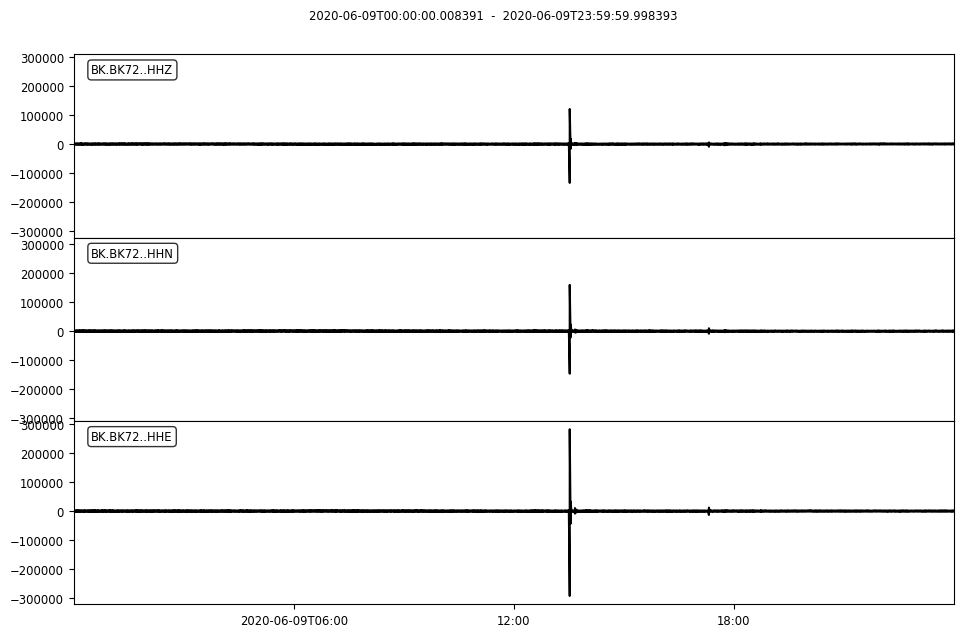

In [17]:
st = read("./Rot Seis/Local/*161")
print(st.__str__(extended=True))

tr0=st[0]
tr1=st[1]
tr2=st[2]
print (tr0.stats)
print (tr1.stats)
print (tr2.stats)

#create overview plot of all traces over full length of file
st.plot(color='black',size=(1000,650),equal_scale=True)

**Select time window** for further analysis, by 
- setting start time in variable "eqtime" in UTC notation and
- setting the length of the window in seconds in varibale "end"

Then plot seismogram of the traces in the selected time window 

2020-06-09T00:00:00.008391Z 2020-06-09T23:59:59.998391Z
************************
2020-06-09T00:00:00.008391Z 2020-06-09T13:32:03.000000Z 2020-06-09T00:00:00.008391Z
2020-06-09T00:00:00.008391Z 2020-06-09T13:32:03.000000Z 48722.991609 48731.991609
3 Trace(s) in Stream:
BK.BK72..HHE | 2020-06-09T13:32:02.998391Z - 2020-06-09T13:32:11.998391Z | 100.0 Hz, 901 samples
BK.BK72..HHN | 2020-06-09T13:32:02.998393Z - 2020-06-09T13:32:11.998393Z | 100.0 Hz, 901 samples
BK.BK72..HHZ | 2020-06-09T13:32:02.998391Z - 2020-06-09T13:32:11.998391Z | 100.0 Hz, 901 samples
**
**


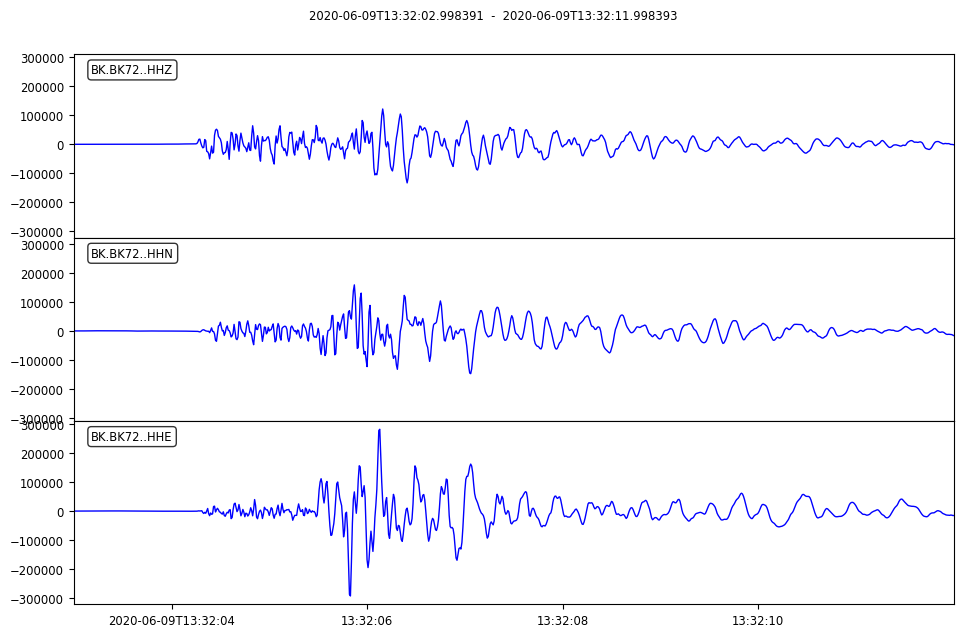

In [21]:
dt=st[0].stats.starttime
tend=st[0].stats.endtime
print (dt,tend)

print("************************")

filebegin=UTCDateTime(dt)
endx=UTCDateTime(tend)
eqtime=UTCDateTime("2020-06-09T13:32:03")
print (dt,eqtime,filebegin)
begin=eqtime-filebegin
end=begin+9
print (dt, eqtime, begin, end)
ev = st.slice(starttime=dt+begin, endtime=dt+end)
print (ev)

print ("**")
print ("**")
ev.plot(color= "blue",size=(1000,650),equal_scale=True)

Ground Velocity


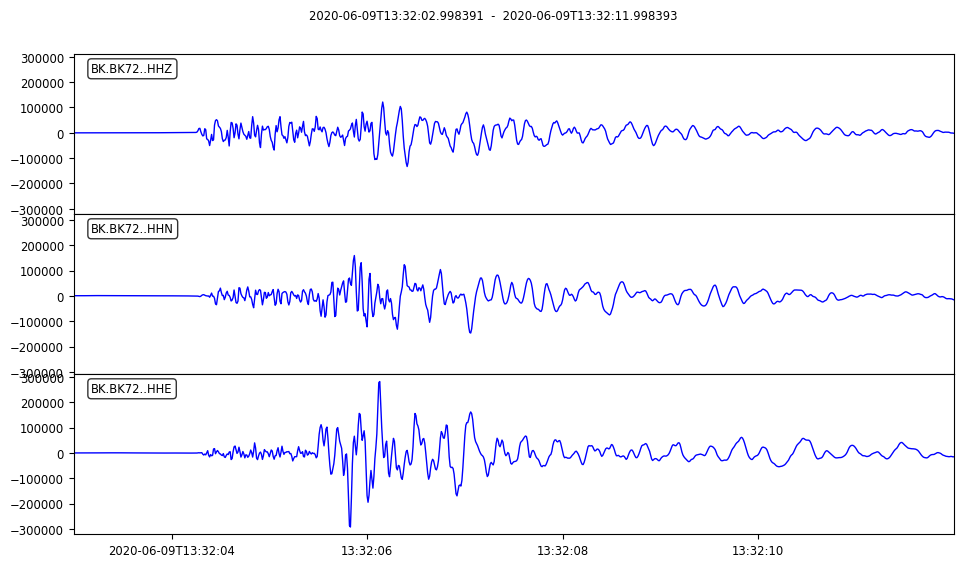




Ground Displacement


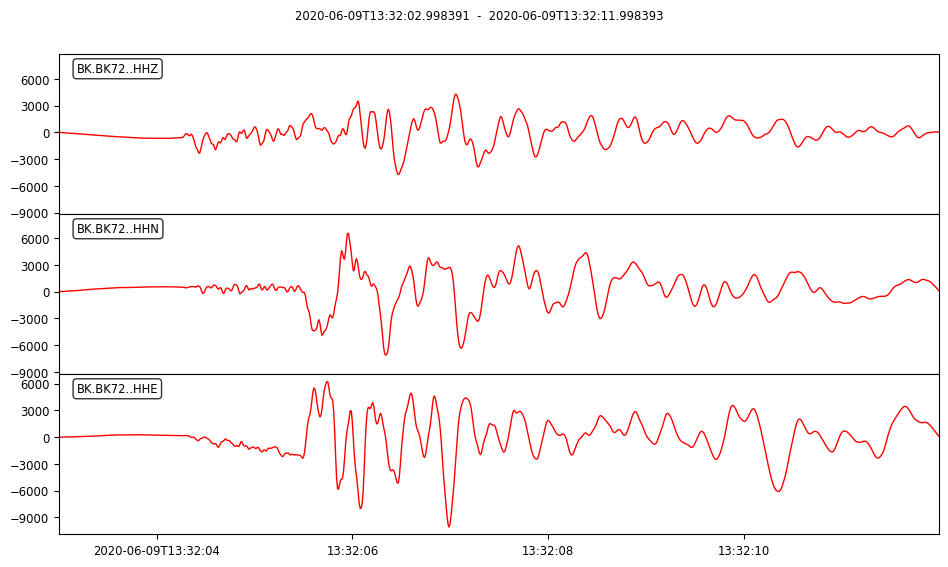




Ground Acceleration


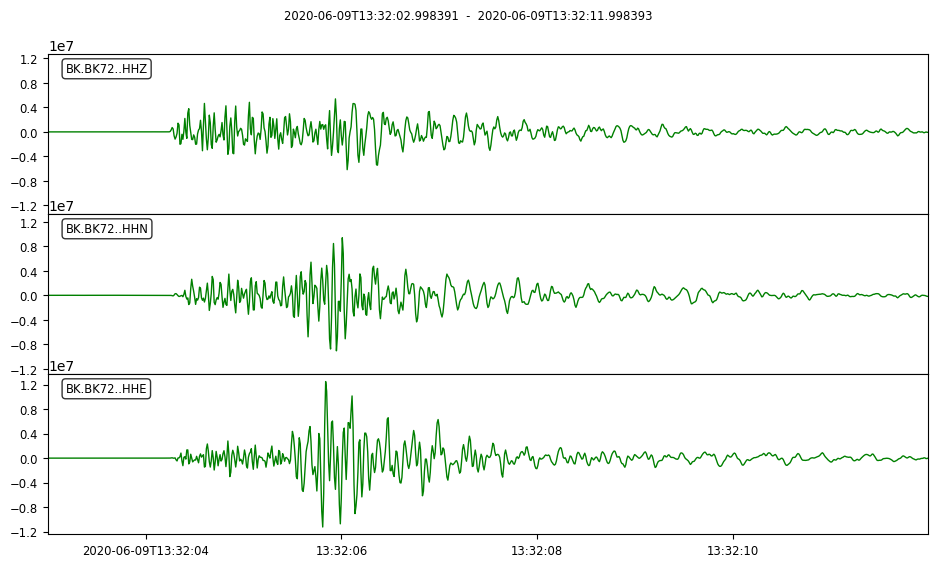

In [29]:
#what=int(input("do you want to differentiate =1, integrate =2, or both =3?"))
               


#integrating
ev_int=ev.copy()
ev_int.detrend('demean')
ev_int.integrate(method='cumtrapz')
#ev_int.integrate(method='spline')
#ev_int.plot(outfile="Local EQ 1 Tilt corrected.png")
#ev_int.write("./Rot Seis/local/Seis", format = "MSEED")

#differentiate
ev_diff=ev.copy()
ev_diff.differentiate()
#ev_diff.plot(outfile="Local EQ 1 Tilt corrected.png")
#ev_diff.write("./Rot Seis/local/Seis", format = "MSEED")

print ("Ground Velocity")
ev.plot(color= "blue",size=(1000,580),equal_scale=True)
print()
print()
print()
print ("Ground Displacement")
ev_int.plot(color ='red',size=(1000,580),equal_scale=True)
print()
print()
print()
print ("Ground Acceleration")
ev_diff.plot(color ='green',size=(1000,580),equal_scale=True)